In [23]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [73]:
N = 3
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

var3 = df[cols[N % 7]]
print(var3)

0       1.4
1       0.9
2       0.5
3       1.4
4       1.0
       ... 
2995    0.3
2996    0.9
2997    0.2
2998    1.6
2999    0.6
Name: Screen_Time_Before_Bed, Length: 3000, dtype: float64


In [74]:
var3_np = var3.values
print(var3_np)

[1.4 0.9 0.5 ... 0.2 1.6 0.6]


### 1

In [75]:
# 1. Среднее
print("Среднее:", var3_np.mean())
# 2. Дисперсия
print("Дисперсия:", var3_np.var())
# 3. Мода
mode_result = stats.mode(var3_np)
print("Мода:", mode_result[0], "(встречается", mode_result[1], "раз)")
# 4. Медиана
print("Медиана:", np.median(var3_np))
# 5. Квантили уровня 0.25, 0.5, 0.75
print("Квантили (0.25, 0.5, 0.75):", np.quantile(var3_np, [0.25, 0.5, 0.75]))
# 6. Эксцесс
print("Эксцесс:", stats.kurtosis(var3_np))
# 7. Асимметрия
print("Асимметрия:", stats.skew(var3_np))
# 8. Интерквартильный размах
q75, q25 = np.percentile(var3_np, [75, 25])
print("Интерквартильный размах:", q75 - q25)

Среднее: 1.0067333333333335
Дисперсия: 0.24284799555555553
Мода: 1.0 (встречается 233 раз)
Медиана: 1.0
Квантили (0.25, 0.5, 0.75): [0.7 1.  1.4]
Эксцесс: -0.35033868704647286
Асимметрия: 0.09837930491958932
Интерквартильный размах: 0.7


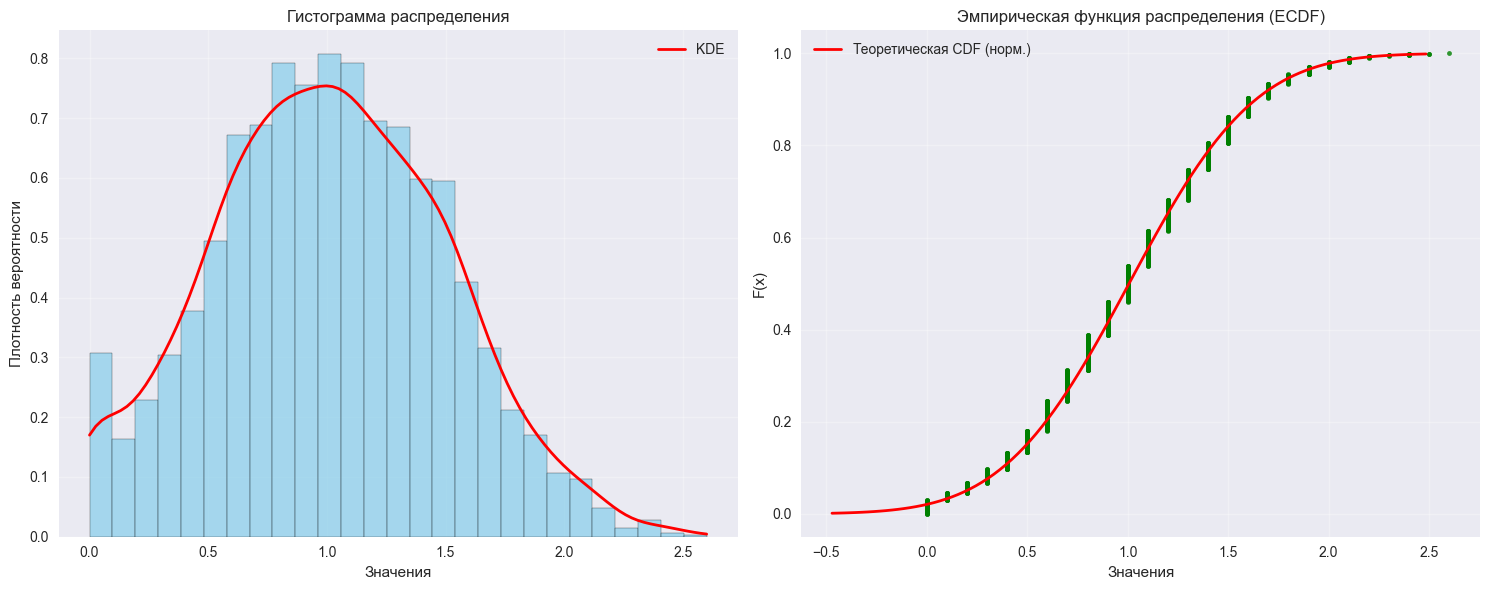

Объем выборки: 3000
Минимум: 0.000
Максимум: 2.600
Среднее: 1.007
Стандартное отклонение: 0.493


In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. ГИСТОГРАММА
ax1.hist(var3_np, bins='auto', alpha=0.7, color='skyblue', edgecolor='black', density=True)
ax1.set_xlabel('Значения')
ax1.set_ylabel('Плотность вероятности')
ax1.set_title('Гистограмма распределения')
ax1.grid(True, alpha=0.3)

# Добавляем линии плотности (KDE) для наглядности
kde = stats.gaussian_kde(var3_np)
x_range = np.linspace(var3_np.min(), var3_np.max(), 100)
ax1.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
ax1.legend()

# 2. ЭМПИРИЧЕСКАЯ ФУНКЦИЯ РАСПРЕДЕЛЕНИЯ (ECDF)
# Сортируем данные и вычисляем ECDF
x = np.sort(var3_np)
y = np.arange(1, len(x) + 1) / len(x)

ax2.plot(x, y, marker='.', linestyle='none', alpha=0.8, color='green')
ax2.set_xlabel('Значения')
ax2.set_ylabel('F(x)')
ax2.set_title('Эмпирическая функция распределения (ECDF)')
ax2.grid(True, alpha=0.3)

# Добавляем теоретическую CDF для нормального распределения (опционально)
if len(var3_np) > 1:
    mean, std = np.mean(var3_np), np.std(var3_np)
    theoretical_x = np.linspace(mean - 3*std, mean + 3*std, 100)
    theoretical_y = stats.norm.cdf(theoretical_x, mean, std)
    ax2.plot(theoretical_x, theoretical_y, 'r-', linewidth=2, label='Теоретическая CDF (норм.)')
    ax2.legend()

plt.tight_layout()
plt.show()

print(f"Объем выборки: {len(var3_np)}")
print(f"Минимум: {var3_np.min():.3f}")
print(f"Максимум: {var3_np.max():.3f}")
print(f"Среднее: {var3_np.mean():.3f}")
print(f"Стандартное отклонение: {var3_np.std():.3f}")

### 2

In [77]:
def chi_square_normality_test(data, alpha=0.05, k=None):
    """
    Критерий хи-квадрат для проверки нормальности
    """
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)  # исправленное стандартное отклонение
    
    # Определяем количество интервалов (по правилу Стерджеса)
    if k is None:
        k = int(1 + 3.322 * np.log10(n))
    
    # Создаем интервалы на основе теоретического нормального распределения
    theoretical_min = mean - 4*std
    theoretical_max = mean + 4*std
    bins = np.linspace(theoretical_min, theoretical_max, k + 1)
    
    # Наблюдаемые частоты
    observed, _ = np.histogram(data, bins=bins)
    
    # Ожидаемые частоты (теоретические)
    expected = np.zeros(k)
    for i in range(k):
        # Вероятность попадания в i-й интервал
        p_i = (stats.norm.cdf(bins[i+1], mean, std) - 
               stats.norm.cdf(bins[i], mean, std))
        expected[i] = n * p_i
    
    # Объединяем интервалы с ожидаемой частотой < 5
    i = 0
    while i < len(expected):
        if expected[i] < 5:
            if i == len(expected) - 1:
                # Объединяем с предыдущим
                observed[i-1] += observed[i]
                expected[i-1] += expected[i]
                observed = np.delete(observed, i)
                expected = np.delete(expected, i)
                bins = np.delete(bins, i)
            else:
                # Объединяем со следующим
                observed[i] += observed[i+1]
                expected[i] += expected[i+1]
                observed = np.delete(observed, i+1)
                expected = np.delete(expected, i+1)
                bins = np.delete(bins, i+1)
        else:
            i += 1
    
    # Вычисляем статистику хи-квадрат
    chi2_stat = np.sum((observed - expected)**2 / expected)
    
    # Степени свободы: k - 3 (k интервалов, оценено 2 параметра: mean и std)
    df = len(observed) - 3
    critical_value = stats.chi2.ppf(1 - alpha, df)
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)
    
    return chi2_stat, critical_value, p_value, df

# Применяем критерий
chi2_stat, crit_val, p_val, df = chi_square_normality_test(var3_np)
print("КРИТЕРИЙ ХИ-КВАДРАТ:")
print(f"Статистика: χ² = {chi2_stat:.4f}")
print(f"Критическое значение: {crit_val:.4f}")
print(f"p-value: {p_val:.4f}")
print(f"Степени свободы: {df}")
print(f"Гипотеза нормальности {'не отвергается' if chi2_stat < crit_val else 'отвергается'}")

КРИТЕРИЙ ХИ-КВАДРАТ:
Статистика: χ² = 83.3556
Критическое значение: 14.0671
p-value: 0.0000
Степени свободы: 7
Гипотеза нормальности отвергается


In [78]:
def skewness_kurtosis_test(data, alpha=0.05):
    """
    Критерий на основе асимметрии и экссесса
    """
    n = len(data)
    
    # Вычисляем асимметрию и эксцесс
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)  # эксцесс Фишера (нормальное = 0)
    
    # Стандартные ошибки
    se_skew = np.sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
    se_kurt = np.sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))
    
    # Z-статистики
    z_skew = skew / se_skew
    z_kurt = kurt / se_kurt
    
    # Критические значения (двусторонний тест)
    z_critical = stats.norm.ppf(1 - alpha/2)
    
    p_skew = 2 * (1 - stats.norm.cdf(abs(z_skew)))
    p_kurt = 2 * (1 - stats.norm.cdf(abs(z_kurt)))
    
    return (skew, kurt, z_skew, z_kurt, z_critical, p_skew, p_kurt)

# Применяем критерий
skew, kurt, z_skew, z_kurt, z_crit, p_skew, p_kurt = skewness_kurtosis_test(var3_np)
print("\nКРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА:")
print(f"Асимметрия: {skew:.4f}, Z = {z_skew:.4f}, p-value = {p_skew:.4f}")
print(f"Эксцесс: {kurt:.4f}, Z = {z_kurt:.4f}, p-value = {p_kurt:.4f}")
print(f"Критическое Z: ±{z_crit:.4f}")
print("Гипотеза нормальности отвергается, если |Z| > критического значения")


КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА:
Асимметрия: 0.0984, Z = 2.2009, p-value = 0.0277
Эксцесс: -0.3503, Z = -3.9202, p-value = 0.0001
Критическое Z: ±1.9600
Гипотеза нормальности отвергается, если |Z| > критического значения


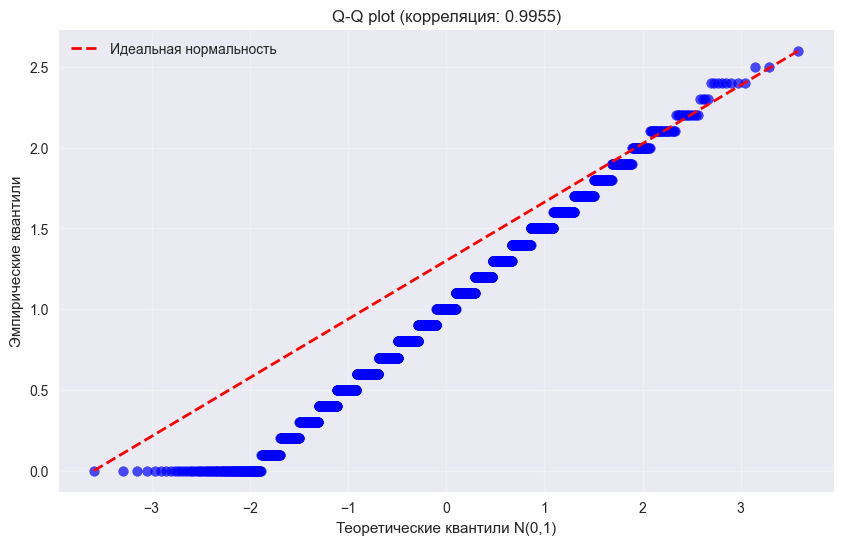


Корреляция на Q-Q plot: 0.9955
Чем ближе корреляция к 1, тем лучше соответствие нормальному распределению


In [79]:
def manual_qq_plot(data):
    """
    Ручное построение Q-Q plot
    """
    # Сортируем данные
    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    # Эмпирические квантили
    empirical_quantiles = sorted_data
    
    # Теоретические квантили нормального распределения
    # Используем медианные ранги
    ranks = np.arange(1, n + 1)
    theoretical_probs = (ranks - 0.5) / n
    theoretical_quantiles = stats.norm.ppf(theoretical_probs)
    
    # Линия идеального соответствия
    x_range = np.array([theoretical_quantiles[0], theoretical_quantiles[-1]])
    y_range = np.array([empirical_quantiles[0], empirical_quantiles[-1]])
    
    # Коэффициент корреляции для оценки нормальности
    correlation = np.corrcoef(theoretical_quantiles, empirical_quantiles)[0, 1]
    
    # Строим график
    plt.figure(figsize=(10, 6))
    plt.scatter(theoretical_quantiles, empirical_quantiles, alpha=0.7, color='blue')
    plt.plot(x_range, y_range, 'r--', linewidth=2, label='Идеальная нормальность')
    plt.xlabel('Теоретические квантили N(0,1)')
    plt.ylabel('Эмпирические квантили')
    plt.title(f'Q-Q plot (корреляция: {correlation:.4f})')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
    
    return correlation, theoretical_quantiles, empirical_quantiles

# Строим Q-Q plot
correlation, theoretical_q, empirical_q = manual_qq_plot(var3_np)
print(f"\nКорреляция на Q-Q plot: {correlation:.4f}")
print("Чем ближе корреляция к 1, тем лучше соответствие нормальному распределению")

### 3

Исходные данные: n=3000, Shapiro p-value: 0.9908


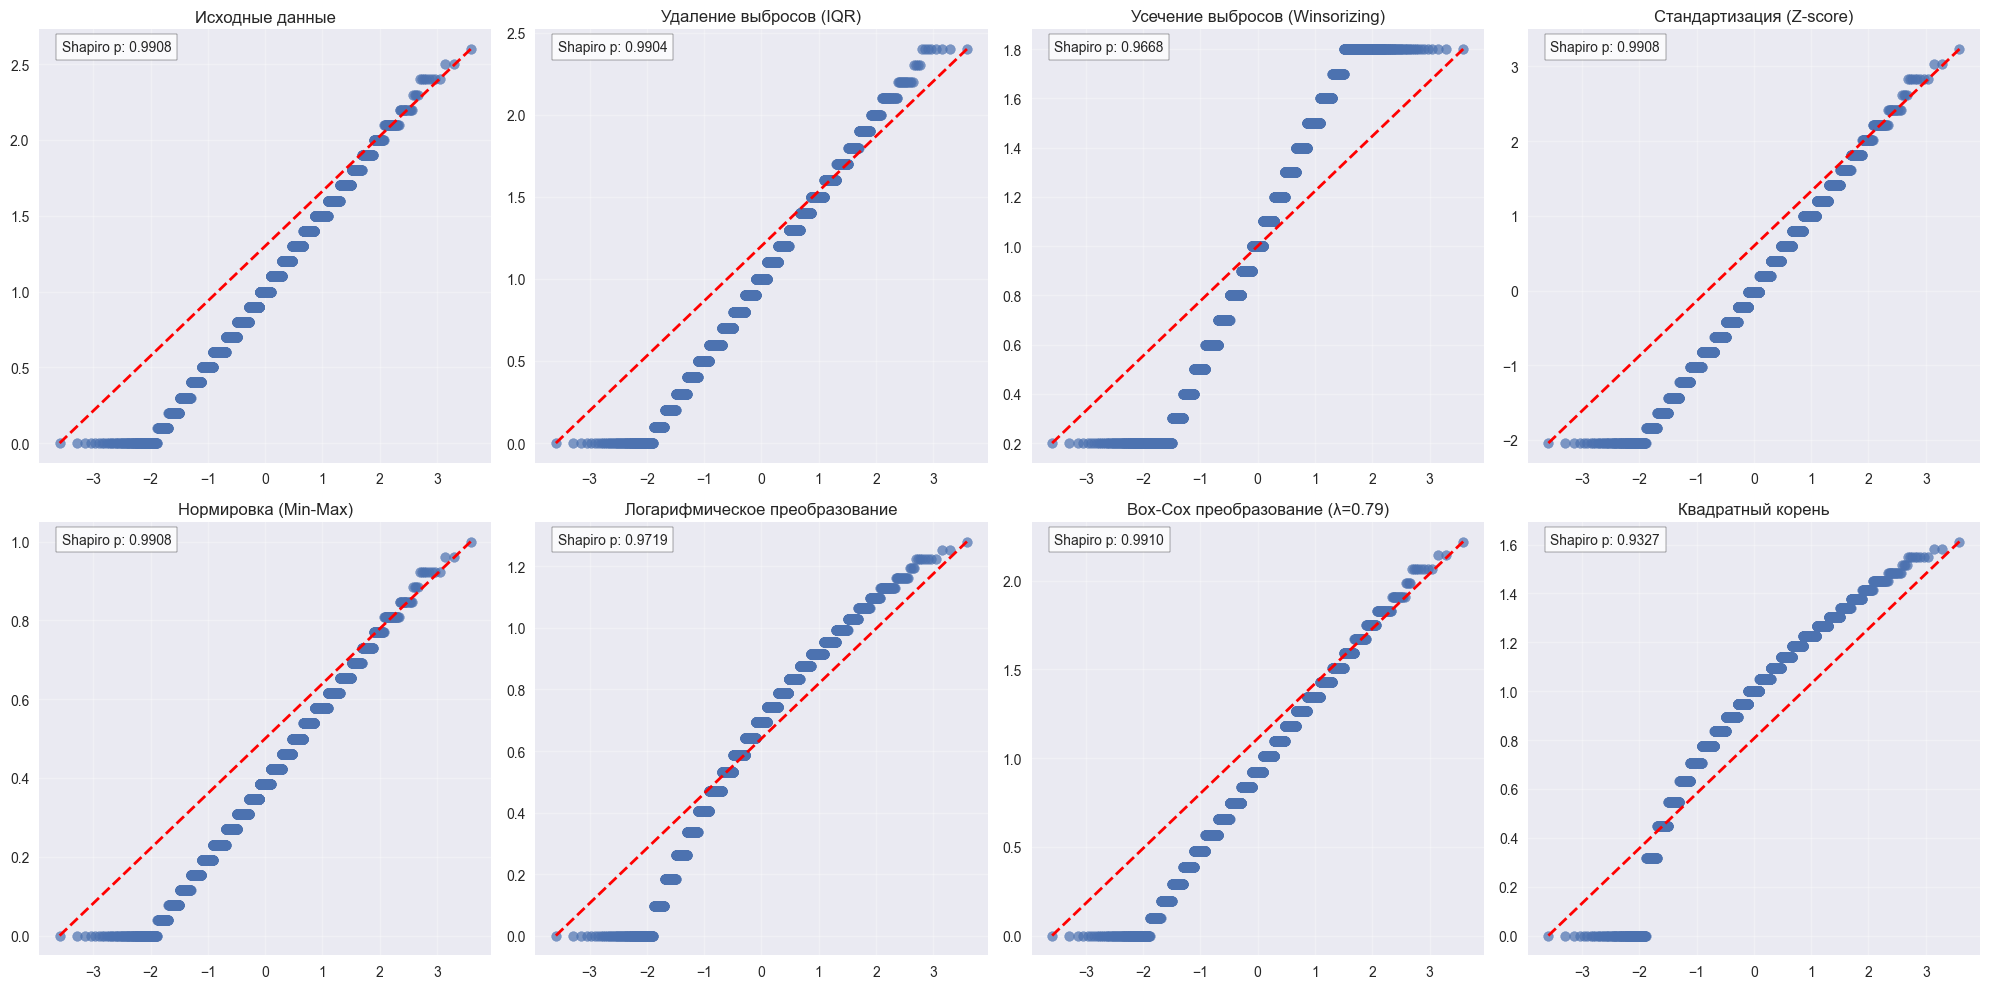


СРАВНИТЕЛЬНАЯ ТАБЛИЦА:
Метод				Shapiro p-value		Изменение
------------------------------------------------------------
Исходные            	0.990754		+0.000000
Без выбросов        	0.990448		-0.000305
Winsorized          	0.966785		-0.023968
Стандартизация      	0.990754		+0.000000
Нормировка          	0.990754		+0.000000
Логарифм            	0.971864		-0.018889
Box-Cox             	0.991028		+0.000274
Квадратный корень   	0.932726		-0.058028

Наилучший метод: Box-Cox (p-value: 0.991028)

Выбранные преобразованные данные: Box-Cox
Размер: 3000
Shapiro-Wilk p-value: 0.991028


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Исходные данные
original_data = var3_np.copy()
print(f"Исходные данные: n={len(original_data)}, Shapiro p-value: {stats.shapiro(original_data)[0]:.4f}")

# Создаем фигуру для сравнения
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Функция для построения Q-Q plot
def plot_qq(data, ax, title):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    ranks = np.arange(1, n + 1)
    theoretical_probs = (ranks - 0.5) / n
    theoretical_quantiles = stats.norm.ppf(theoretical_probs)
    
    ax.scatter(theoretical_quantiles, sorted_data, alpha=0.7)
    x_range = np.array([theoretical_quantiles[0], theoretical_quantiles[-1]])
    y_range = np.array([sorted_data[0], sorted_data[-1]])
    ax.plot(x_range, y_range, 'r--', linewidth=2)
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    
    # Добавляем p-value Шапиро-Уилка
    shapiro_p = stats.shapiro(data)[0]
    ax.text(0.05, 0.95, f'Shapiro p: {shapiro_p:.4f}', 
            transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

# 0. Исходные данные
plot_qq(original_data, axes[0], 'Исходные данные')

# 1. УДАЛЕНИЕ ВЫБРОСОВ (метод IQR)
def remove_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

data_no_outliers = remove_outliers_iqr(original_data)
plot_qq(data_no_outliers, axes[1], 'Удаление выбросов (IQR)')

# 2. УСЕЧЕНИЕ ВЫБРОСОВ (Winsorizing)
def winsorize_data(data, limits=(0.05, 0.05)):
    lower = np.percentile(data, limits[0]*100)
    upper = np.percentile(data, (1-limits[1])*100)
    data_winsorized = data.copy()
    data_winsorized[data_winsorized < lower] = lower
    data_winsorized[data_winsorized > upper] = upper
    return data_winsorized

data_winsorized = winsorize_data(original_data)
plot_qq(data_winsorized, axes[2], 'Усечение выбросов (Winsorizing)')

# 3. СТАНДАРТИЗАЦИЯ (Z-score)
def standardize_data(data):
    return (data - np.mean(data)) / np.std(data)

data_standardized = standardize_data(original_data)
plot_qq(data_standardized, axes[3], 'Стандартизация (Z-score)')

# 4. НОРМИРОВКА (Min-Max)
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

data_normalized = normalize_data(original_data)
plot_qq(data_normalized, axes[4], 'Нормировка (Min-Max)')

# 5. ЛОГАРИФМИЧЕСКОЕ ПРЕОБРАЗОВАНИЕ
def apply_log_transform(data):
    # Добавляем константу, если есть отрицательные значения
    if np.min(data) <= 0:
        constant = np.abs(np.min(data)) + 1
        return np.log(data + constant)
    return np.log(data)

data_log = apply_log_transform(original_data)
plot_qq(data_log, axes[5], 'Логарифмическое преобразование')

# 6. ПРЕОБРАЗОВАНИЕ БОКСА-КОКСА
def box_cox_transform(data):
    # Box-Cox требует положительных значений
    if np.min(data) <= 0:
        data_positive = data - np.min(data) + 1
    else:
        data_positive = data
    
    # Находим оптимальный параметр λ
    transformed_data, lambda_val = stats.boxcox(data_positive)
    return transformed_data, lambda_val

try:
    data_boxcox, lambda_val = box_cox_transform(original_data)
    plot_qq(data_boxcox, axes[6], f'Box-Cox преобразование (λ={lambda_val:.2f})')
except Exception as e:
    axes[6].text(0.5, 0.5, f'Ошибка: {str(e)}', ha='center', va='center')
    axes[6].set_title('Box-Cox преобразование')

# 7. КВАДРАТНЫЙ КОРЕНЬ
def apply_sqrt_transform(data):
    if np.min(data) < 0:
        data_positive = data - np.min(data)
    else:
        data_positive = data
    return np.sqrt(data_positive)

data_sqrt = apply_sqrt_transform(original_data)
plot_qq(data_sqrt, axes[7], 'Квадратный корень')

plt.tight_layout()
plt.show()

# Сравнительная таблица результатов
print("\nСРАВНИТЕЛЬНАЯ ТАБЛИЦА:")
print("Метод\t\t\t\tShapiro p-value\t\tИзменение")
print("-" * 60)
methods = [
    ("Исходные", original_data),
    ("Без выбросов", data_no_outliers),
    ("Winsorized", data_winsorized),
    ("Стандартизация", data_standardized),
    ("Нормировка", data_normalized),
    ("Логарифм", data_log),
    ("Box-Cox", data_boxcox if 'data_boxcox' in locals() else original_data),
    ("Квадратный корень", data_sqrt)
]

best_method = None
best_p_value = 0

for name, data in methods:
    try:
        shapiro_p, shapiro_stat = stats.shapiro(data)
        change = shapiro_p - stats.shapiro(original_data)[0]
        print(f"{name:20}\t{shapiro_p:.6f}\t\t{change:+.6f}")
        
        if shapiro_p > best_p_value:
            best_p_value = shapiro_p
            best_method = name
    except:
        print(f"{name:20}\tНе удалось вычислить")

print(f"\nНаилучший метод: {best_method} (p-value: {best_p_value:.6f})")

# Применяем лучший метод
if best_method == "Без выбросов":
    final_data = data_no_outliers
elif best_method == "Winsorized":
    final_data = data_winsorized
elif best_method == "Стандартизация":
    final_data = data_standardized
elif best_method == "Нормировка":
    final_data = data_normalized
elif best_method == "Логарифм":
    final_data = data_log
elif best_method == "Box-Cox":
    final_data = data_boxcox
elif best_method == "Квадратный корень":
    final_data = data_sqrt
else:
    final_data = original_data

print(f"\nВыбранные преобразованные данные: {best_method}")
print(f"Размер: {len(final_data)}")
print(f"Shapiro-Wilk p-value: {stats.shapiro(final_data)[0]:.6f}")

In [81]:
# 1. Среднее
print("Среднее:", final_data.mean())
# 2. Дисперсия
print("Дисперсия:", final_data.var())
# 3. Мода
mode_result = stats.mode(final_data)
print("Мода:", mode_result[0], "(встречается", mode_result[1], "раз)")
# 4. Медиана
print("Медиана:", np.median(final_data))
# 5. Квантили уровня 0.25, 0.5, 0.75
print("Квантили (0.25, 0.5, 0.75):", np.quantile(final_data, [0.25, 0.5, 0.75]))
# 6. Эксцесс
print("Эксцесс:", stats.kurtosis(final_data))
# 7. Асимметрия
print("Асимметрия:", stats.skew(final_data))
# 8. Интерквартильный размах
q75, q25 = np.percentile(final_data, [75, 25])
print("Интерквартильный размах:", q75 - q25)

Среднее: 0.9185965774641262
Дисперсия: 0.18379264887580826
Мода: 0.9239077914012729 (встречается 233 раз)
Медиана: 0.9239077914012729
Квантили (0.25, 0.5, 0.75): [0.65971462 0.92390779 1.26377564]
Эксцесс: -0.3730085006444068
Асимметрия: -0.02887275353860082
Интерквартильный размах: 0.6040610212641243


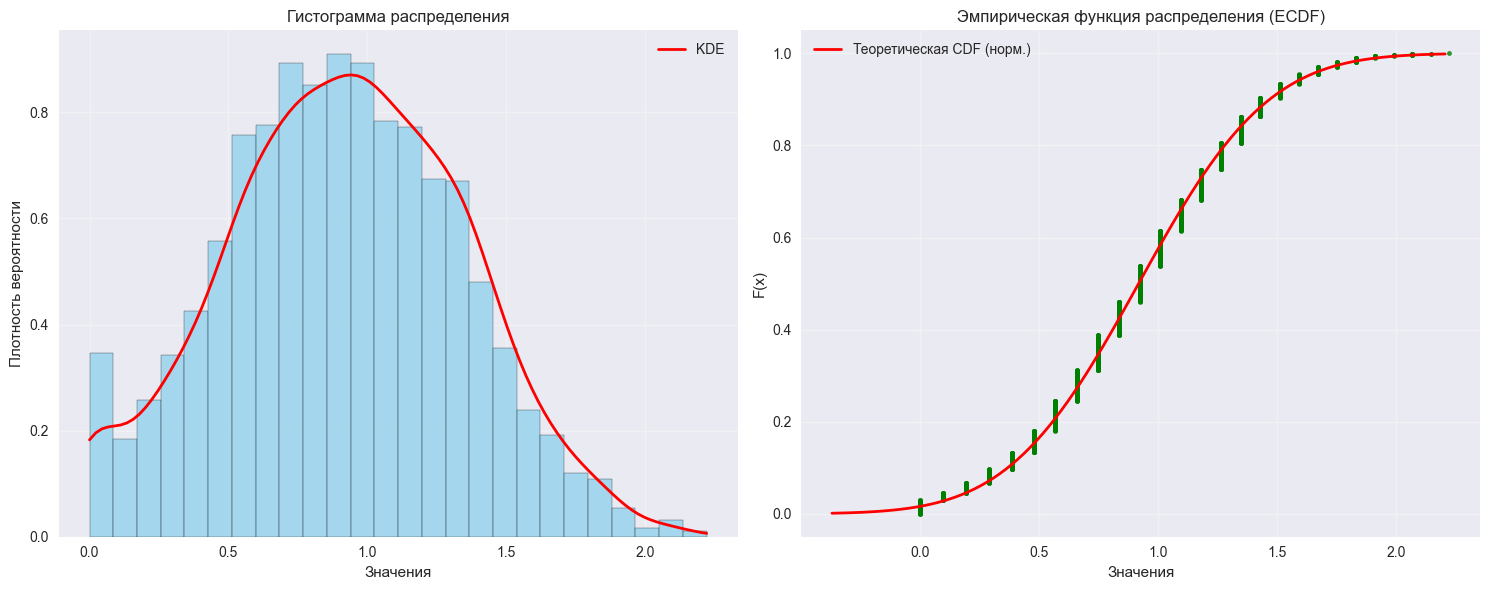

Объем выборки: 3000
Минимум: 0.000
Максимум: 2.221
Среднее: 0.919
Стандартное отклонение: 0.429


In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. ГИСТОГРАММА
ax1.hist(final_data, bins=26, alpha=0.7, color='skyblue', edgecolor='black', density=True)
ax1.set_xlabel('Значения')
ax1.set_ylabel('Плотность вероятности')
ax1.set_title('Гистограмма распределения')
ax1.grid(True, alpha=0.3)

# Добавляем линии плотности (KDE) для наглядности
kde = stats.gaussian_kde(final_data)
x_range = np.linspace(final_data.min(), final_data.max(), 100)
ax1.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
ax1.legend()

# 2. ЭМПИРИЧЕСКАЯ ФУНКЦИЯ РАСПРЕДЕЛЕНИЯ (ECDF)
# Сортируем данные и вычисляем ECDF
x = np.sort(final_data)
y = np.arange(1, len(x) + 1) / len(x)

ax2.plot(x, y, marker='.', linestyle='none', alpha=0.8, color='green')
ax2.set_xlabel('Значения')
ax2.set_ylabel('F(x)')
ax2.set_title('Эмпирическая функция распределения (ECDF)')
ax2.grid(True, alpha=0.3)

# Добавляем теоретическую CDF для нормального распределения (опционально)
if len(final_data) > 1:
    mean, std = np.mean(final_data), np.std(final_data)
    theoretical_x = np.linspace(mean - 3*std, mean + 3*std, 100)
    theoretical_y = stats.norm.cdf(theoretical_x, mean, std)
    ax2.plot(theoretical_x, theoretical_y, 'r-', linewidth=2, label='Теоретическая CDF (норм.)')
    ax2.legend()

plt.tight_layout()
plt.show()

print(f"Объем выборки: {len(final_data)}")
print(f"Минимум: {final_data.min():.3f}")
print(f"Максимум: {final_data.max():.3f}")
print(f"Среднее: {final_data.mean():.3f}")
print(f"Стандартное отклонение: {final_data.std():.3f}")

In [43]:

# Применяем критерий
chi2_stat, crit_val, p_val, df = chi_square_normality_test(final_data)
print("КРИТЕРИЙ ХИ-КВАДРАТ:")
print(f"Статистика: χ² = {chi2_stat:.4f}")
print(f"Критическое значение: {crit_val:.4f}")
print(f"p-value: {p_val:.4f}")
print(f"Степени свободы: {df}")
print(f"Гипотеза нормальности {'не отвергается' if chi2_stat < crit_val else 'отвергается'}")

КРИТЕРИЙ ХИ-КВАДРАТ:
Статистика: χ² = 788.9665
Критическое значение: 14.0671
p-value: 0.0000
Степени свободы: 7
Гипотеза нормальности отвергается


In [44]:
# Применяем критерий
skew, kurt, z_skew, z_kurt, z_crit, p_skew, p_kurt = skewness_kurtosis_test(final_data)
print("\nКРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА:")
print(f"Асимметрия: {skew:.4f}, Z = {z_skew:.4f}, p-value = {p_skew:.4f}")
print(f"Эксцесс: {kurt:.4f}, Z = {z_kurt:.4f}, p-value = {p_kurt:.4f}")
print(f"Критическое Z: ±{z_crit:.4f}")
print("Гипотеза нормальности отвергается, если |Z| > критического значения")


КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА:
Асимметрия: -0.0314, Z = -0.7032, p-value = 0.4820
Эксцесс: -1.2220, Z = -13.6741, p-value = 0.0000
Критическое Z: ±1.9600
Гипотеза нормальности отвергается, если |Z| > критического значения


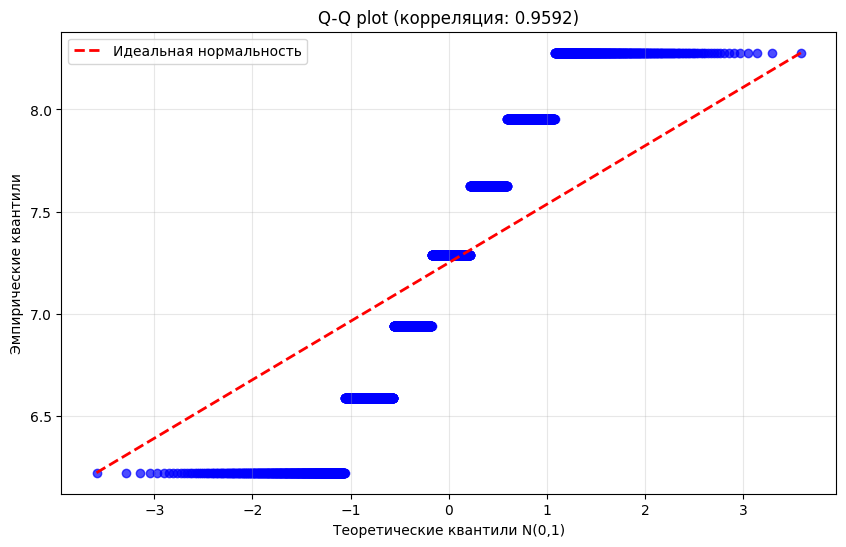


Корреляция на Q-Q plot: 0.9592
Чем ближе корреляция к 1, тем лучше соответствие нормальному распределению


In [45]:
# Строим Q-Q plot
correlation, theoretical_q, empirical_q = manual_qq_plot(final_data)
print(f"\nКорреляция на Q-Q plot: {correlation:.4f}")
print("Чем ближе корреляция к 1, тем лучше соответствие нормальному распределению")

### 4

In [65]:
grouped = df.groupby('School_Grade')
print(grouped.size())

School_Grade
10th    487
11th    479
12th    529
7th     497
8th     482
9th     526
dtype: int64


In [86]:
print(cols[N % 7])

Screen_Time_Before_Bed


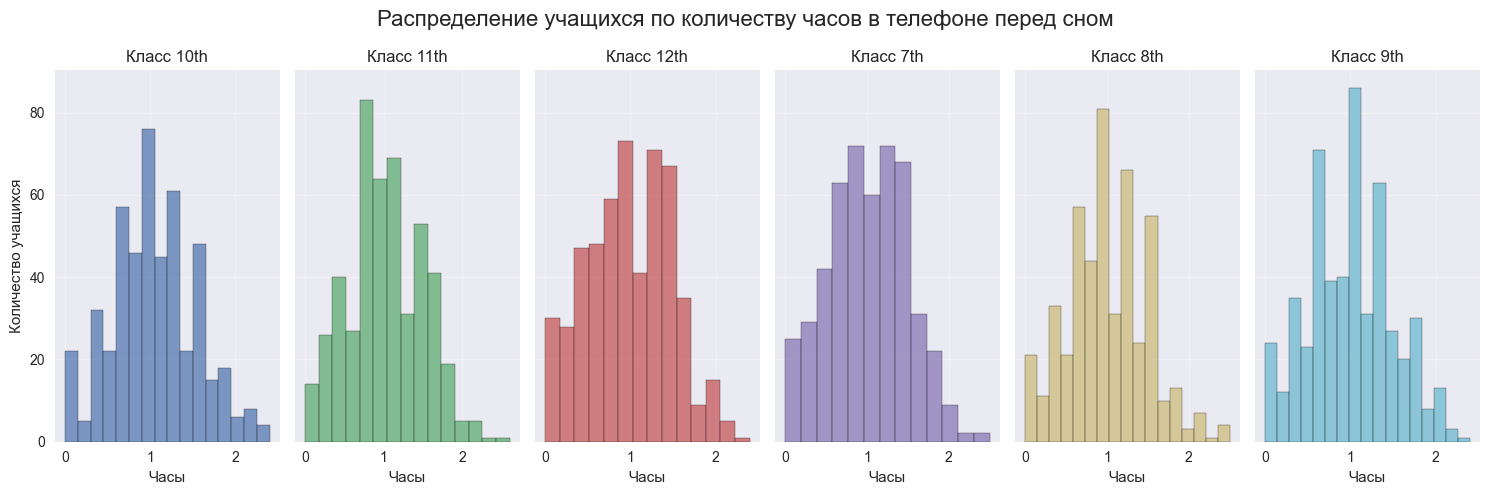

In [88]:
# Создаем subplot для гистограмм
fig, axes = plt.subplots(1, len(grouped), figsize=(15, 5), sharey=True)
if len(grouped) == 1:
    axes = [axes]

fig.suptitle('Распределение учащихся по количеству часов в телефоне перед сном', fontsize=16)

for i, (grade, group_data) in enumerate(grouped):
    axes[i].hist(group_data[cols[N % 7]], bins='auto', alpha=0.7, color=f'C{i}', edgecolor='black')
    axes[i].set_title(f'Класс {grade}')
    axes[i].set_xlabel('Часы')
    if i == 0:
        axes[i].set_ylabel('Количество учащихся')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [91]:
# Рассчитываем основные статистики для возраста
age_stats = grouped[cols[N % 7]].agg([
    ('Количество_учеников', 'count'),
    ('Среднее время', 'mean'),
    ('Дисперсия времени', 'var'),
]).round(2)

print("Статистика по классам:")
print(age_stats)

Статистика по классам:
              Количество_учеников  Среднее время  Дисперсия времени
School_Grade                                                       
10th                          487           1.02               0.24
11th                          479           1.02               0.23
12th                          529           0.98               0.24
7th                           497           1.01               0.25
8th                           482           1.01               0.24
9th                           526           1.01               0.24
